In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = r'E:\datasets\car\all_anonymized_2015_11_2017_03.csv'

df = pd.read_csv(link)

C:\Users\duc.nguyen\AppData\Local\Temp\ipykernel_3712\1635933304.py:3: DtypeWarning: Columns (7,8,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(link)


In [3]:
df.isna().sum() / df.shape[0] * 100

maker                  14.605343
model                  31.899495
mileage                10.205263
manufacture_year       10.430261
engine_displacement    20.924076
engine_power           15.617527
body_type              31.605455
color_slug             94.103400
stk_year               48.077633
transmission           20.873863
door_count             17.292097
seat_count             21.095062
fuel_type              52.002583
date_created            0.000000
date_last_seen          0.000000
price_eur               0.000000
dtype: float64

In [5]:
df.drop('color_slug', axis=1, inplace=True)

In [6]:
df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:35.46558+00,2017-03-16 18:57:35.46558+00,1295.34
3552908,skoda,felicia,NaN,2000.0,NaN,50.0,other,NaN,NaN,NaN,NaN,electric,2017-03-16 18:57:37.761349+00,2017-03-16 18:57:37.761349+00,1295.34
3552909,skoda,octavia,230000.0,2006.0,1900.0,100.0,other,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:40.435847+00,2017-03-16 18:57:40.435847+00,1295.34
3552910,skoda,fabia,NaN,2001.0,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:57:43.595523+00,2017-03-16 18:57:43.595523+00,1295.34


<BarContainer object of 81 artists>

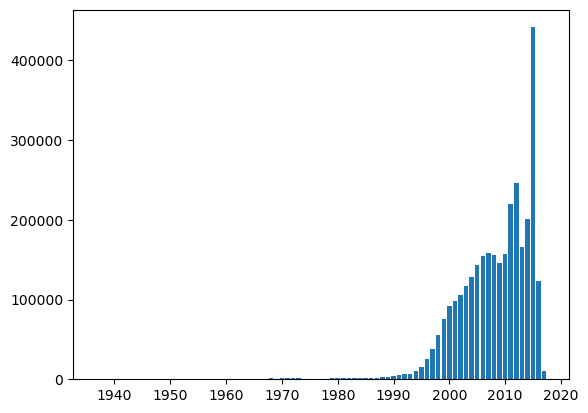

In [7]:
df_year = df[df['manufacture_year'] > 1936]
df_year_size = df_year.groupby('manufacture_year').size()

plt.bar(df_year_size.index, df_year_size.values)

In [8]:
df_wrong_year = df[df['manufacture_year'] < 1936]
df_wrong_year

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
9984,skoda,octavia,NaN,1480.0,1600.0,77.0,compact,None,NaN,None,None,gasoline,2015-11-14 20:09:19.349703+00,2016-01-27 20:40:15.46361+00,6624.72
9992,citroen,c3,NaN,1377.0,1400.0,50.0,compact,None,NaN,None,None,diesel,2015-11-14 20:09:19.762934+00,2016-01-27 20:40:15.46361+00,6254.63
10061,NaN,NaN,135000.0,1796.0,1796.0,120.0,compact,None,auto,None,None,gasoline,2015-11-14 20:09:22.890638+00,2016-01-27 20:40:15.46361+00,4034.05
10071,NaN,NaN,NaN,1354.0,NaN,77.0,compact,None,man,None,None,gasoline,2015-11-14 20:09:23.376006+00,2016-01-27 20:40:15.46361+00,2957.07
10079,NaN,NaN,NaN,1585.0,1616.0,79.0,compact,None,man,None,None,gasoline,2015-11-14 20:09:23.774599+00,2016-01-27 20:40:15.46361+00,1554.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552818,skoda,superb,160000.0,1600.0,2000.0,125.0,other,NaN,NaN,NaN,NaN,electric,2017-03-16 18:52:41.951796+00,2017-03-16 18:52:41.951796+00,1295.34
3552832,skoda,superb,173000.0,1730.0,2000.0,125.0,other,NaN,NaN,NaN,NaN,electric,2017-03-16 18:53:27.944852+00,2017-03-16 18:53:27.944852+00,1295.34
3552835,skoda,fabia,175000.0,1750.0,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:53:33.483606+00,2017-03-16 18:53:33.483606+00,1295.34
3552837,skoda,fabia,245418.0,1886.0,1886.0,47.0,other,NaN,NaN,NaN,NaN,diesel,2017-03-16 18:53:34.760217+00,2017-03-16 18:53:34.760217+00,1295.34


In [9]:
df[df['manufacture_year'] == df['engine_displacement']]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
64,ford,galaxy,263000.0,1998.0,1998.0,85.0,NaN,None,man,5,7,gasoline,2015-11-14 18:54:01.823634+00,2016-01-27 20:40:15.46361+00,740.19
474,nissan,primera,257000.0,1998.0,1998.0,96.0,NaN,None,man,5,5,gasoline,2015-11-14 18:55:32.728987+00,2016-01-27 20:40:15.46361+00,1291.64
765,honda,accord,297703.0,1997.0,1997.0,96.0,NaN,None,man,5,5,gasoline,2015-11-14 18:55:43.202207+00,2016-01-27 20:40:15.46361+00,689.49
1510,chrysler,pt-cruiser,120533.0,2000.0,2000.0,104.0,NaN,None,man,5,5,gasoline,2015-11-14 18:56:12.721568+00,2016-01-27 20:40:15.46361+00,1850.48
3891,NaN,NaN,248821.0,1998.0,1998.0,84.0,NaN,None,man,5,7,gasoline,2015-11-14 18:57:51.113189+00,2016-01-27 20:40:15.46361+00,1829.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552765,skoda,octavia,197000.0,1595.0,1595.0,75.0,other,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:49:25.601069+00,2017-03-16 18:49:25.601069+00,1295.34
3552767,skoda,fabia,162000.0,1397.0,1397.0,44.0,other,NaN,NaN,NaN,NaN,NaN,2017-03-16 18:49:26.906919+00,2017-03-16 18:49:26.906919+00,1295.34
3552779,skoda,fabia,265000.0,1896.0,1896.0,47.0,other,2017.0,NaN,NaN,NaN,NaN,2017-03-16 18:49:33.789699+00,2017-03-16 18:49:33.789699+00,1295.34
3552837,skoda,fabia,245418.0,1886.0,1886.0,47.0,other,NaN,NaN,NaN,NaN,diesel,2017-03-16 18:53:34.760217+00,2017-03-16 18:53:34.760217+00,1295.34


# Seat count

In [10]:
temp_df = df.dropna(subset = ['seat_count'])
temp_df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [11]:
def check_numeric(cell):
    return type(cell) == int or type(cell) == float


In [12]:
seat_df = temp_df.loc[temp_df['seat_count'].apply(check_numeric), ]

In [13]:
seat_df[seat_df['seat_count'] > 40]

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
1417986,mercedes-benz,NaN,790000.0,1997.0,NaN,250.0,other,NaN,NaN,NaN,51.0,NaN,2016-02-11 02:56:54.467836+00,2016-07-03 16:59:31.418386+00,37961.00
1520116,NaN,NaN,230800.0,2011.0,7790.0,243.0,other,2016.0,man,NaN,55.0,NaN,2016-02-12 16:44:18.131132+00,2016-07-03 18:46:42.484611+00,139230.00
1550617,NaN,NaN,324000.0,2007.0,11967.0,301.0,other,NaN,auto,NaN,61.0,NaN,2016-02-13 06:46:15.260965+00,2016-07-03 18:48:18.17471+00,73780.00
1668986,NaN,NaN,670000.0,1987.0,NaN,184.0,other,NaN,man,NaN,45.0,NaN,2016-02-16 08:02:16.872553+00,2016-07-03 18:56:13.753261+00,9401.00
1766944,mercedes-benz,NaN,790000.0,1999.0,NaN,280.0,other,NaN,NaN,NaN,53.0,NaN,2016-02-18 06:57:35.404921+00,2016-07-03 19:02:05.287884+00,40341.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468863,NaN,NaN,1150000.0,2007.0,10518.0,324.0,other,NaN,NaN,2.0,57.0,diesel,2017-02-27 15:19:05.673162+00,2017-02-27 15:19:05.673162+00,1295.34
3468864,NaN,NaN,1200000.0,2009.0,10518.0,294.0,other,NaN,NaN,2.0,49.0,diesel,2017-02-27 15:19:10.887692+00,2017-02-27 15:19:10.887692+00,1295.34
3468865,NaN,NaN,980000.0,2007.0,12419.0,353.0,other,NaN,NaN,2.0,55.0,diesel,2017-02-27 15:19:16.146618+00,2017-02-27 15:19:16.146618+00,1295.34
3494613,NaN,NaN,298000.0,2004.0,NaN,300.0,other,NaN,NaN,NaN,138.0,diesel,2017-03-04 15:41:57.483762+00,2017-03-04 15:41:57.483762+00,1295.34


In [14]:
df_minione = df[(df['maker'] == 'mini') & (df['model'] == 'one')]
df_minione

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
2430,mini,one,135390.0,2004.0,1598.0,66.0,NaN,None,man,3,4,gasoline,2015-11-14 18:56:51.716665+00,2016-01-27 20:40:15.46361+00,4034.05
2546,mini,one,171000.0,2006.0,1598.0,66.0,NaN,None,man,3,5,gasoline,2015-11-14 18:56:56.471505+00,2016-01-27 20:40:15.46361+00,4774.24
6067,mini,one,60000.0,2007.0,1397.0,70.0,NaN,None,man,3,4,gasoline,2015-11-14 18:59:17.214401+00,2016-01-27 20:40:15.46361+00,6254.63
6249,mini,one,124000.0,NaN,1598.0,66.0,NaN,None,man,3,4,gasoline,2015-11-14 18:59:24.426383+00,2016-01-27 20:40:15.46361+00,5477.42
6667,mini,one,151064.0,2002.0,1598.0,66.0,NaN,None,man,3,5,gasoline,2015-11-14 18:59:41.242101+00,2016-01-27 20:40:15.46361+00,3293.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3510118,mini,one,135290.0,2006.0,1600.0,66.0,coupe,NaN,man,3.0,4.0,gasoline,2017-03-08 17:14:10.536104+00,2017-03-08 17:14:10.536104+00,1295.34
3517223,mini,one,184881.0,2004.0,1598.0,66.0,coupe,NaN,NaN,6.0,4.0,gasoline,2017-03-09 15:36:07.869854+00,2017-03-09 15:36:07.869854+00,1295.34
3521985,mini,one,165000.0,2002.0,1598.0,66.0,coupe,NaN,NaN,3.0,54.0,gasoline,2017-03-10 15:38:00.797269+00,2017-03-10 15:38:00.797269+00,1295.34
3523600,mini,one,165000.0,2002.0,1598.0,66.0,coupe,NaN,man,3.0,NaN,gasoline,2017-03-10 17:16:21.472365+00,2017-03-10 17:16:21.472365+00,1295.34


In [15]:
df_minione['seat_count'].value_counts()

4.0     2770
4       1952
None    1265
5.0      579
5        469
3.0       11
0.0        3
3          2
2          1
2.0        1
54.0       1
Name: seat_count, dtype: int64

# Mileage

In [16]:
df[df['mileage'] <= 100].value_counts('manufacture_year')

manufacture_year
2015.0    124596
2016.0     75418
2017.0      7098
2014.0      5405
2005.0      2335
           ...  
1770.0         1
1780.0         1
1781.0         1
1795.0         1
1475.0         1
Length: 350, dtype: int64

<Axes: >

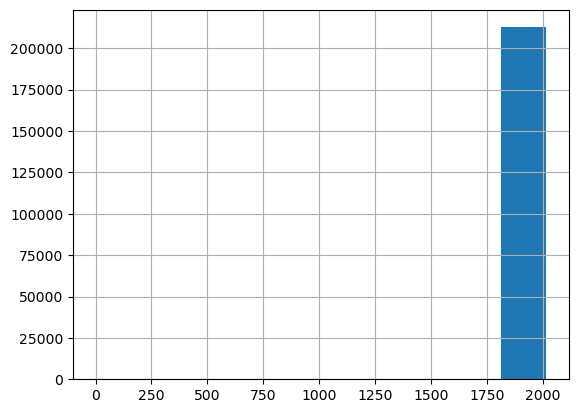

In [17]:
df.loc[df['mileage'] <= 50, 'manufacture_year'].hist()

<Axes: >

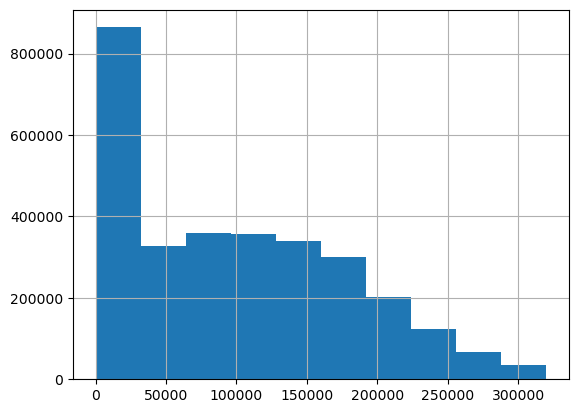

In [18]:
df.loc[(df['mileage'] < 320000) & (df['mileage'] > 0), 'mileage'].hist()

In [40]:
temp_df = df[df['price_eur'] > 10000000]
temp_df.sort_values('price_eur', ascending=False).head(20)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
2046574,renault,kangoo,NaN,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,2016-02-25 03:12:30.336022+00,2016-07-03 17:13:09.109904+00,2.706149e+12
2161499,bmw,NaN,100.0,2000.0,14999.0,NaN,other,NaN,NaN,NaN,NaN,NaN,2016-02-27 02:04:28.767413+00,2016-07-03 17:13:54.959981+00,2.679451e+12
2046614,NaN,NaN,NaN,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,2016-02-25 03:16:58.331353+00,2016-07-03 17:13:09.346472+00,2.729847e+11
1944936,citroen,berlingo,245966.0,2009.0,1600.0,55.0,other,NaN,NaN,NaN,NaN,NaN,2016-02-22 11:54:16.053724+00,2016-07-03 17:02:05.489827+00,1.492235e+10
2002825,citroen,berlingo,245966.0,2009.0,1600.0,55.0,other,NaN,NaN,NaN,NaN,NaN,2016-02-24 09:11:08.178651+00,2016-07-03 17:12:43.228819+00,1.492235e+10
1720583,citroen,berlingo,245966.0,2009.0,1600.0,55.0,other,NaN,NaN,NaN,NaN,NaN,2016-02-17 11:38:32.085813+00,2016-07-03 17:09:41.305704+00,1.492235e+10
1742633,subaru,impreza,38000.0,2011.0,12500.0,221.0,other,NaN,auto,NaN,NaN,NaN,2016-02-17 20:34:00.97288+00,2016-07-03 17:09:45.996582+00,1.480387e+10
2042604,seat,ibiza,130000.0,2005.0,1198.0,47.0,other,NaN,man,3.0,5.0,NaN,2016-02-24 22:41:26.351125+00,2016-07-03 17:13:09.177885+00,1.000000e+09
2249846,mercedes-benz,NaN,37000.0,2006.0,1796.0,120.0,other,NaN,auto,2.0,2.0,NaN,2016-02-29 12:10:02.317556+00,2016-07-03 17:14:59.783563+00,1.000000e+09
2012075,audi,a5,23000.0,2009.0,NaN,155.0,other,NaN,NaN,NaN,NaN,NaN,2016-02-24 13:35:36.60726+00,2016-07-03 17:12:59.068334+00,9.712194e+08


In [34]:
temp_df[['maker', 'model']].drop_duplicates().head(30)

,maker,model
32979,NaN,NaN
61706,bmw,NaN
78528,mercedes-benz,NaN
81993,bmw,m4
163422,honda,NaN
204223,skoda,felicia
208730,seat,NaN
216213,audi,80
248908,fiat,NaN
332842,ford,mondeo


In [37]:
df[(df['maker'] == 'bmw') & (df['model'] == 'm4')].sort_values('price_eur', ascending=False).head(30)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
81993,bmw,m4,NaN,NaN,NaN,100.0,compact,None,NaN,None,None,gasoline,2015-11-17 02:11:46.959269+00,2016-01-27 20:40:15.46361+00,28719682.35
2825575,bmw,m4,700.0,2016.0,2979.0,368.0,other,NaN,auto,NaN,NaN,NaN,2016-05-15 17:00:23.429287+00,2016-07-15 16:50:45.253203+00,350012.95
2821516,bmw,m4,999.0,2016.0,2979.0,368.0,other,NaN,auto,2.0,2.0,NaN,2016-05-15 14:01:15.645715+00,2016-07-03 20:59:20.901235+00,275010.18
2549842,bmw,m4,10.0,2016.0,2979.0,368.0,other,NaN,NaN,2.0,5.0,NaN,2016-03-06 21:43:30.383604+00,2016-07-03 17:42:33.134964+00,200281.27
2034514,bmw,m4,1.0,NaN,2979.0,317.0,other,NaN,auto,2.0,4.0,NaN,2016-02-24 18:28:46.509005+00,2016-07-03 17:06:39.790409+00,129520.00
2014440,bmw,m4,10.0,NaN,2979.0,317.0,other,NaN,auto,2.0,4.0,NaN,2016-02-24 13:39:32.305072+00,2016-07-03 19:15:40.567072+00,126573.00
1213354,bmw,m4,11000.0,2015.0,2979.0,317.0,coupe,None,auto,2,4,gasoline,2016-01-12 22:53:50.624326+00,2016-01-20 03:35:31.810234+00,118888.00
1531062,bmw,m4,21483.0,2015.0,3000.0,317.0,other,NaN,auto,2.0,NaN,NaN,2016-02-12 18:05:22.859881+00,2016-07-03 17:04:34.919058+00,114950.00
2128866,bmw,m4,300.0,2016.0,2979.0,317.0,other,NaN,auto,2.0,4.0,NaN,2016-02-26 10:57:16.021326+00,2016-07-03 19:25:19.239809+00,109900.00
1105533,bmw,m4,9980.0,2015.0,2979.0,317.0,NaN,None,auto,2,4,gasoline,2016-01-08 06:36:59.616075+00,2016-01-19 13:11:45.627977+00,109040.34


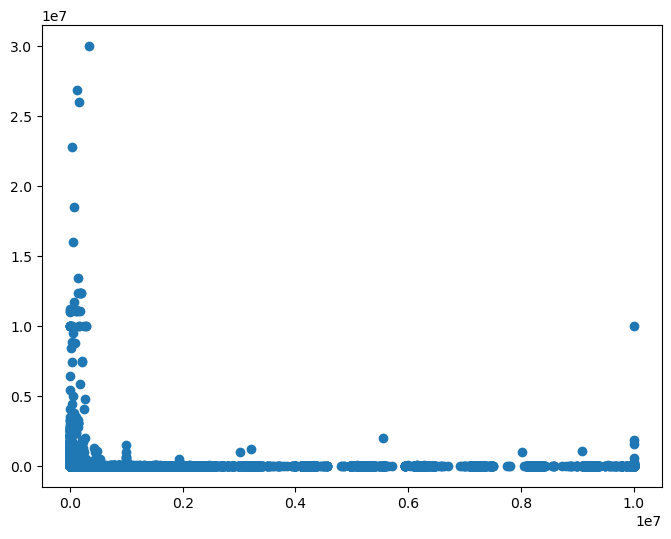

In [25]:
temp_df = df[df['price_eur'] < 50000000]

plt.figure(figsize=(8,6))
plt.scatter(temp_df['mileage'], temp_df['price_eur'])

# Maker

In [14]:
df['maker'].nunique()

46

In [15]:
df['maker'].unique()

array(['ford', 'skoda', 'bmw', nan, 'suzuki', 'nissan', 'opel', 'citroen',
       'seat', 'kia', 'audi', 'rover', 'toyota', 'hyundai', 'fiat',
       'volvo', 'chevrolet', 'mazda', 'jeep', 'mercedes-benz', 'subaru',
       'chrysler', 'lancia', 'smart', 'honda', 'porsche', 'dodge',
       'mitsubishi', 'mini', 'jaguar', 'lexus', 'hummer', 'bentley',
       'tesla', 'maserati', 'isuzu', 'lamborghini', 'lotus', 'volkswagen',
       'peugeot', 'renault', 'alfa-romeo', 'infinity', 'rolls-royce',
       'aston-martin', 'land-rover', 'dacia'], dtype=object)

In [49]:
df['maker'].value_counts()

skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
ford             240556
opel             217708
fiat             132669
citroen          121913
renault          106831
peugeot           92130
hyundai           80602
seat              74645
toyota            72908
nissan            68008
kia               48607
volvo             48271
mazda             45666
mini              35678
smart             32918
suzuki            31184
mitsubishi        28463
honda             26225
porsche           24317
chevrolet         20856
rover             20611
jeep              17075
lancia            13759
subaru            10107
jaguar            10056
chrysler           9296
dodge              5223
alfa-romeo         4734
lexus              3911
dacia              2024
maserati           1912
land-rover         1721
isuzu              1427
bentley            1081
hummer              731
lamborghini         554
infinity        

In [ ]:
df['maker'].value_counts()

In [18]:
df.groupby('maker').price_eur.sum().sort_values(ascending=False)

maker
renault          2.706890e+12
bmw              2.684518e+12
citroen          4.586659e+10
subaru           1.490273e+10
audi             7.668954e+09
mercedes-benz    6.159396e+09
volkswagen       3.231408e+09
ford             3.051006e+09
skoda            2.646070e+09
opel             2.137257e+09
fiat             1.962673e+09
seat             1.777536e+09
porsche          1.657431e+09
volvo            9.427069e+08
hyundai          9.022811e+08
nissan           8.695164e+08
toyota           8.465951e+08
mitsubishi       8.175948e+08
peugeot          6.226713e+08
rover            5.953293e+08
mazda            5.821656e+08
honda            5.488982e+08
kia              5.332880e+08
mini             5.303919e+08
jeep             3.613753e+08
suzuki           3.050317e+08
jaguar           2.844401e+08
smart            2.541026e+08
chevrolet        1.642633e+08
lancia           1.273245e+08
dodge            1.187667e+08
lamborghini      1.130915e+08
bentley          1.118066e+08
mase

In [136]:
# Maker model

df[['maker', 'model']].drop_duplicates().dropna()

,maker,model
0,ford,galaxy
1,skoda,octavia
3,skoda,fabia
13,skoda,favorit
14,suzuki,swift
...,...,...
3458503,mercedes-benz,cls250-cdi
3463665,mercedes-benz,ml250-cdi
3469812,bmw,125d
3504549,mercedes-benz,glk200-cdi


# X

In [41]:
X = df.dropna()

In [44]:
X.to_csv('test.csv', index=None)

In [118]:
X, y = X.drop(['stk_year', 'manufacture_year', 'date_created', 'date_last_seen', 'price_eur'], axis=1) , X.price_eur


In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30851 entries, 507 to 1388289
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                30851 non-null  object 
 1   model                30851 non-null  object 
 2   mileage              30851 non-null  float64
 3   engine_displacement  30851 non-null  float64
 4   engine_power         30851 non-null  float64
 5   body_type            30851 non-null  object 
 6   transmission         30851 non-null  object 
 7   door_count           30851 non-null  object 
 8   seat_count           30851 non-null  object 
 9   fuel_type            30851 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.6+ MB


In [120]:
def number_change(cell):
    try:
        res = int(cell)
        return res
    except:
        return 3

X['door_count'] = X['door_count'].apply(number_change)
X['seat_count'] = X['seat_count'].apply(number_change)

In [121]:
X = pd.get_dummies(X)

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)

LinearRegression()

In [125]:
y_pred = lm.predict(X)

In [126]:
y_pred

array([20641.45553768, 15197.58774984,  8224.77620375, ...,
        1607.2802974 ,  4493.27856529, 14782.48403585])

In [132]:
np.vstack((y.to_numpy(), y_pred)).T

array([[22168.76      , 20641.45553768],
       [ 9437.45      , 15197.58774984],
       [ 1073.28      ,  8224.77620375],
       ...,
       [ 5490.        ,  1607.2802974 ],
       [ 1500.        ,  4493.27856529],
       [15990.        , 14782.48403585]])

In [128]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.549133512484701